In [7]:
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import quantstats as qs
import talib as ta

In [8]:
df = yf.download("BTC-USD")

[*********************100%***********************]  1 of 1 completed


In [9]:
df.tail(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156,29098.910156,31483454557
2022-05-24,29101.125000,29774.355469,28786.589844,29655.585938,29655.585938,26616506245
2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328,29562.361328,27525063551
2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,29267.224609,36774325352
2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748
2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,28814.900391,35519577634
2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,29445.957031,18093886409
2022-05-30,29443.365234,31949.630859,29303.572266,31726.390625,31726.390625,39277993274
2022-05-31,31723.865234,32249.863281,31286.154297,31792.310547,31792.310547,33538210634


In [10]:
# Count nulls
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
# Calculate VWAP
df["VWAP"] = (df.Volume*(df.Close)).cumsum() / df.Volume.cumsum()

In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,VWAP
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,457.334015
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,436.911062
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,419.823580
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,416.734836
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,413.700159


In [13]:
# Drop coulmns
df.drop(columns=["Adj Close", "Volume"])

,Open,High,Low,Close,VWAP
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015
2014-09-18,456.859985,456.859985,413.104004,424.440002,436.911062
2014-09-19,424.102997,427.834991,384.532013,394.795990,419.823580
2014-09-20,394.673004,423.295990,389.882996,408.903992,416.734836
2014-09-21,408.084991,412.425995,393.181000,398.821014,413.700159
...,...,...,...,...,...
2022-06-02,29794.890625,30604.734375,29652.705078,30467.488281,28014.655415
2022-06-03,30467.806641,30633.035156,29375.689453,29704.390625,28015.684187
2022-06-04,29706.138672,29930.564453,29500.005859,29832.914062,28016.385079


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2820 entries, 2014-09-17 to 2022-06-07
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2820 non-null   float64
 1   High       2820 non-null   float64
 2   Low        2820 non-null   float64
 3   Close      2820 non-null   float64
 4   Adj Close  2820 non-null   float64
 5   Volume     2820 non-null   int64  
 6   VWAP       2820 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 176.2 KB


In [15]:
# Convert to datetime index
df.index = pd.to_datetime(df.index)

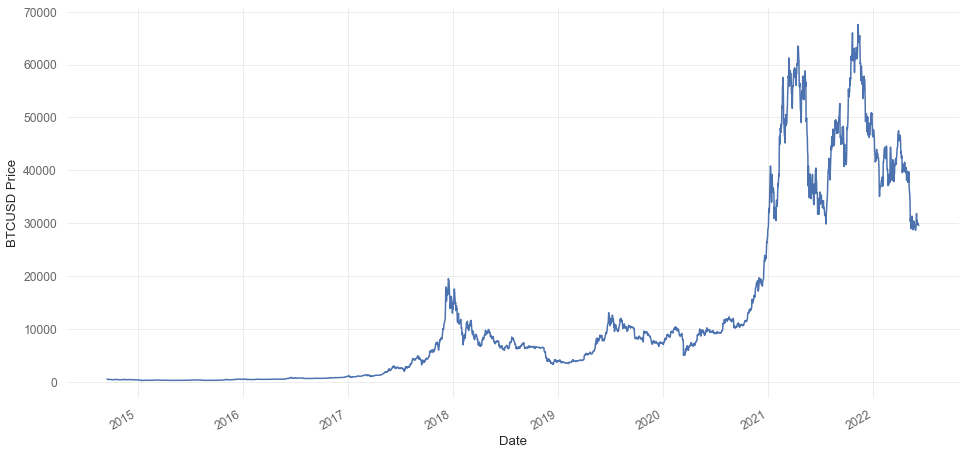

In [16]:
df.Close.plot(figsize=(16, 8))
plt.ylabel("BTCUSD Price")
plt.show()

<!-- # Ichimoku Cloud
The ichimoku cloud is a technical indicator that consists of five plots and a cloud. It can assist in displaying support, esistance, momentum, and trend in a single view. 
We adjusted the parameters for cryptocurrency pairs to 20, 60, 120, 30 because the crypto market is open 24/7 and more volatile than other assets.-->

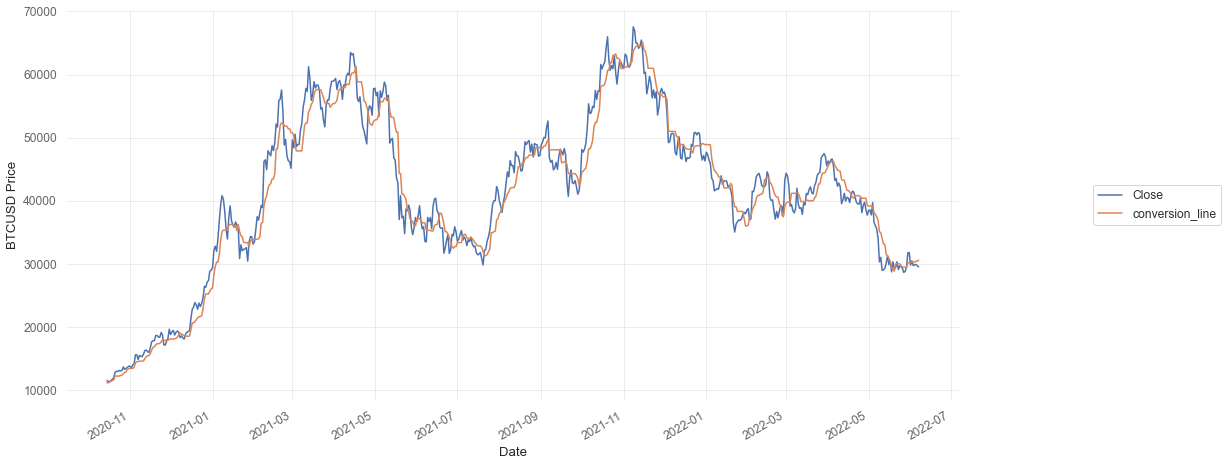

In [17]:
# Tenkansen (Conversion Line)
high_9 = df.High.rolling(9).max()
low_9 = df.Low.rolling(9).min()
df["conversion_line"] = (high_9 + low_9) / 2
conversion_line = df[["Close", "conversion_line"]]
conversion_line[-600:].plot(figsize=(16, 8))
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))
plt.ylabel("BTCUSD Price")
plt.show()

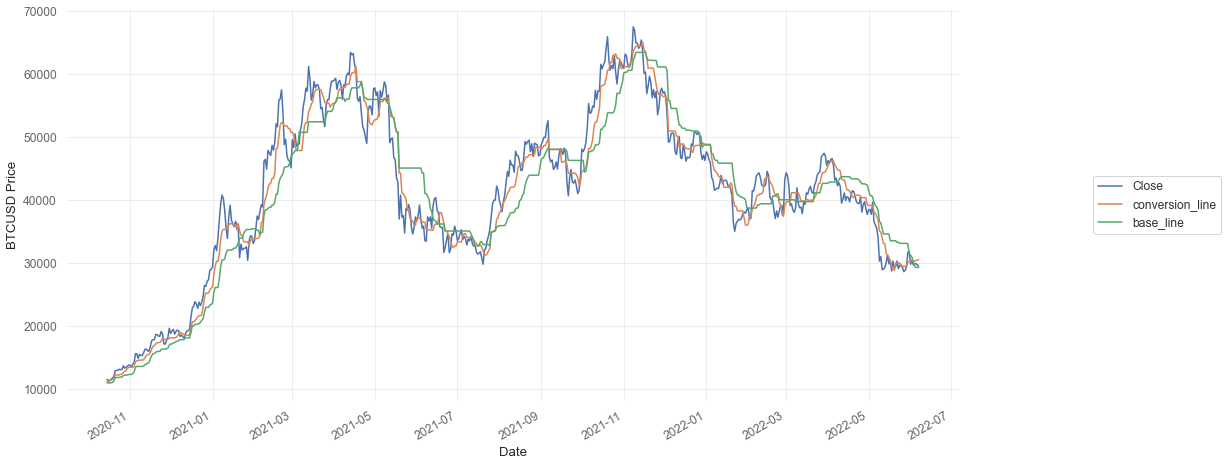

In [18]:
# Kijun-sen (Base Line)
high_26 = df.High.rolling(26).max()
low_26 = df.Low.rolling(26).min()
df["base_line"] = (high_26 + low_26) / 2

base_line = df[["Close", "conversion_line", "base_line"]]
base_line[-600:].plot(figsize=(16, 8))
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))
plt.ylabel("BTCUSD Price")
plt.show()

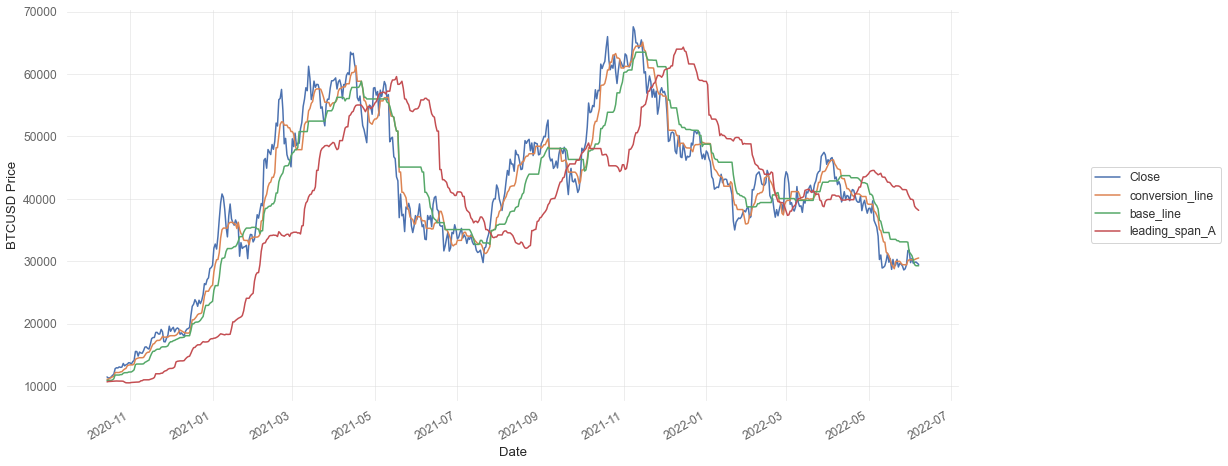

In [19]:
# Senkou Span A (Leading Span A)
df["leading_span_A"] = ((df.conversion_line + df.base_line) / 2).shift(30)

leading_span_A = df[["Close", "conversion_line",
                     "base_line", "leading_span_A"]]

leading_span_A[-600:].plot(figsize=(16, 8))
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))
plt.ylabel("BTCUSD Price")
plt.show()

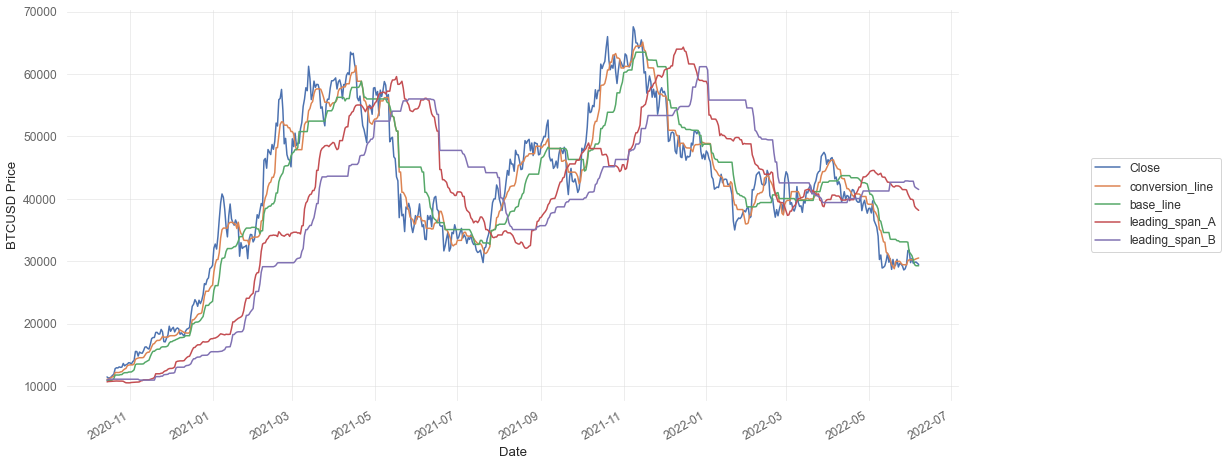

In [20]:
# Senkou Span B (Leading Span B)
high_52 = df.High.rolling(52).max()
low_52 = df.Low.rolling(52).min()
df["leading_span_B"] = ((high_52 + low_52) / 2).shift(30)

leading_span_B = df[["Close", "conversion_line",
                     "base_line", "leading_span_A", "leading_span_B"]]
leading_span_B[-600:].plot(figsize=(16, 8))
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))
plt.ylabel("BTCUSD Price")
plt.show()

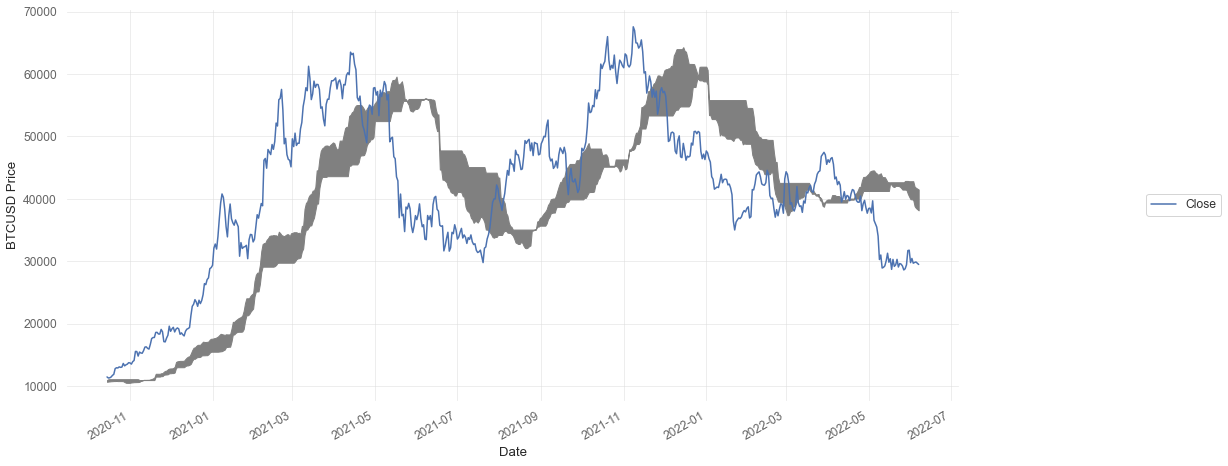

In [21]:
# Ichimoku Cloud
cloud = df[-600:].Close.plot(figsize=(16, 8))
cloud.fill_between(
    df[-600:].index, df[-600:].leading_span_A, df[-600:].leading_span_B, color="grey")
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))
plt.ylabel("BTCUSD Price")
plt.show()

In [23]:
# ADX settings
df["ADX"] = ta.ADX(df.High,df.Low,df.Close,14)
df["plus_DI"] = ta.PLUS_DI(df.High,df.Low,df.Close,14)
df["minus_DI"] = ta.MINUS_DI(df.High,df.Low,df.Close,14)

In [24]:
df["SAR"] = ta.SAR(df["High"].values, df["Low"].values,
                           acceleration=0.02, maximum=0.2)

In [25]:
# Entry 
df["signal"] = np.nan

# Prices are above the cloud
condition_1 = (df.Close > df.leading_span_A) & (df.Close > df.leading_span_B)

# leading Span A (senkou_span_A) is gtreater than leading span B (senkou_span_B)
condition_2 = (df.leading_span_A > df.leading_span_B)

# Conversion Line (tenkan_sen) moves above Base Line (kijun_sen)
condition_3 = (df.conversion_line > df.base_line)

# ADX trending
condition_4 = (df.ADX > 30) & (df.plus_DI > df.minus_DI) 

# Combine the conditions and store in the signal column 1 when all the conditions are true
df.loc[condition_1 & condition_2 & condition_3 & condition_4, "signal"] = 1

In [26]:
# Exit 
# Prices are below the cloud
condition_1 = (df.Close < df.leading_span_A) & (df.Close < df.leading_span_B)

# leading Span A (senkou_span_A) is less than the leading span B (senkou_span_B)
condition_2 = (df.leading_span_A < df.leading_span_B)

# Conversion Line (tenkan_sen) moves below Base Line (kijun_sen)
condition_3 = (df.conversion_line < df.base_line)

# Combine the conditions and store in the signal column 0 when all the conditions are true
df.loc[(condition_1 & condition_2 & condition_3), "signal"] = 0

# If signal NA foward fill with previous signal
df.signal.fillna(method="ffill", inplace=True)

df.iloc[360:400, :]

,Open,High,Low,Close,Adj Close,Volume,VWAP,conversion_line,base_line,leading_span_A,leading_span_B,ADX,plus_DI,minus_DI,SAR,signal
Date,,,,,,,,,,,,,,,,
2015-09-12,239.854996,240.123993,234.753998,235.229004,235.229004,17962600,281.386888,236.416000,228.780006,276.052742,277.379509,38.784460,16.149300,26.686515,226.470047,1.0
2015-09-13,235.242004,235.934998,229.332001,230.511993,230.511993,18478800,281.286277,237.556503,222.674004,275.153992,277.379509,38.413076,15.084609,30.340751,228.401143,1.0
2015-09-14,230.608994,232.440002,227.960999,230.643997,230.643997,20997800,281.172729,236.871002,222.674004,274.775490,277.379509,38.217334,14.391501,30.353101,245.781006,1.0
2015-09-15,230.492004,259.182007,229.822006,230.304001,230.304001,19177800,281.068772,243.571503,229.374504,272.945992,277.973503,36.793446,33.174649,22.919084,227.960999,1.0
2015-09-16,230.250000,231.214996,227.401993,229.091003,229.091003,20144200,280.957435,243.292000,229.374504,270.632240,278.755508,35.156031,32.075908,24.262039,259.182007,1.0
2015-09-17,229.076004,230.285004,228.925995,229.809998,229.809998,18935400,280.854657,243.292000,229.374504,247.651245,262.736504,33.635574,31.673264,23.957481,259.182007,1.0
2015-09-18,233.520996,234.352997,232.184998,232.975006,232.975006,20242200,280.752027,243.292000,229.374504,247.651245,262.736504,32.640883,34.175411,22.921640,258.546407,1.0
2015-09-19,232.858002,233.205002,231.089005,231.492996,231.492996,12712600,280.685804,243.292000,229.374504,247.651245,262.736504,31.552262,33.449965,23.534551,257.923518,1.0
2015-09-20,231.399002,232.365005,230.910004,231.212006,231.212006,14444700,280.610346,243.292000,239.693001,246.849495,262.736504,30.513039,32.932303,23.360726,257.313088,1.0


In [27]:
df["signal_change"] = df.signal.diff()
df["signal_change"].value_counts()

 0.0    2723
 1.0       6
-1.0       6
Name: signal_change, dtype: int64

In [37]:
# Visualize entry position relative to close price
entry = df[df["signal_change"] == 1.0]["Close"].hvplot.scatter(
    color="green",
    marker="^",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = df[df["signal_change"] == -1.0]["Close"].hvplot.scatter(
    color="red",
    marker="v",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400
)


# Visualize close price for the investment
security_close = df[["Close"]].hvplot(
    line_color="lightgray",
    ylabel="Price in $",
    width=1000,
    height=400
)

# Plot Ichimoku indicators
ichi = df[["Close", "conversion_line",
                     "base_line", "leading_span_A", "leading_span_B"]].hvplot(
    ylabel="Price in $",
    width=1000,
    height=400
)


# # Overlay plots
ichiplot = security_close * ichi * entry * exit
ichiplot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

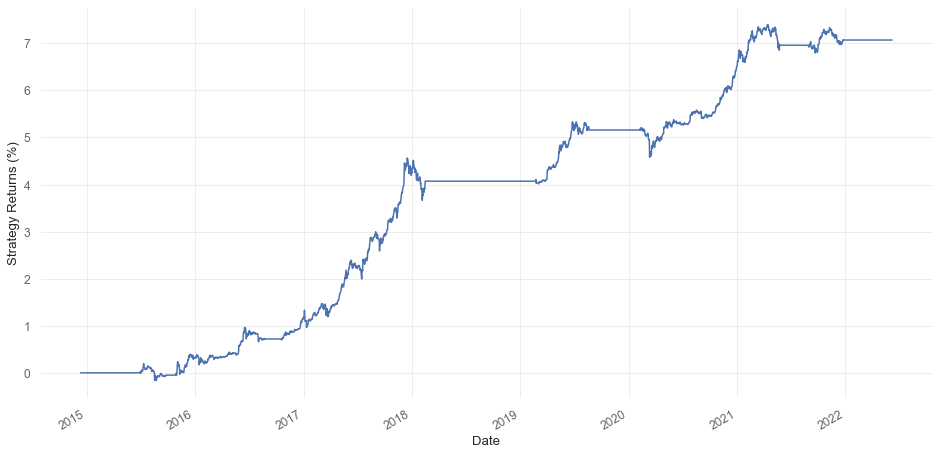

In [38]:
# Calculate daily returns
daily_returns = df.Close.pct_change()

# Calculate strategy returns 
strategy_returns = daily_returns * df.signal.shift(1)
strategy_returns.dropna(inplace=True)

# Plot strategy returns
strategy_returns.cumsum().plot(figsize=(16, 8))
plt.xlabel("Date")
plt.ylabel("Strategy Returns (%)")
plt.show()

In [39]:
# Check Sharpe ratio calculation 
def annualized_sharpe_ratio(returns, N=252):
    return ((N) * returns.mean()) / (returns.std() * np.sqrt(N))

# Sharpe ratio  
excess_daily_strategy_return = strategy_returns 
sharpe = annualized_sharpe_ratio(excess_daily_strategy_return)
print("The Sharpe ratio of strategy is %.2f" % sharpe)

The Sharpe ratio of strategy is 1.27


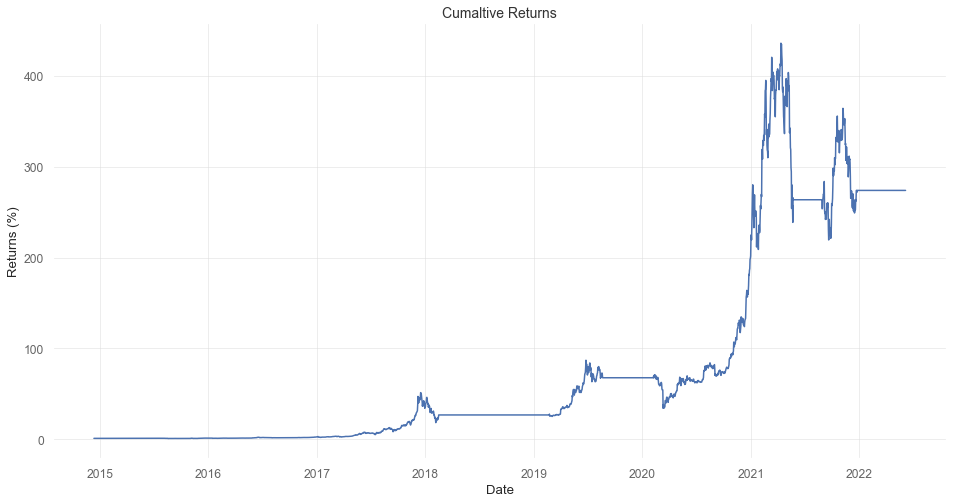

In [40]:
# Calculate the cumulative returns
df["cumulative_returns"] = (strategy_returns+1).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(16, 8))
plt.plot(df["cumulative_returns"])
plt.title("Cumaltive Returns", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Returns (%)")
plt.show()

In [41]:
# strategy_returns.value_counts()

Maximum drawdown of the strategy is -64.33%


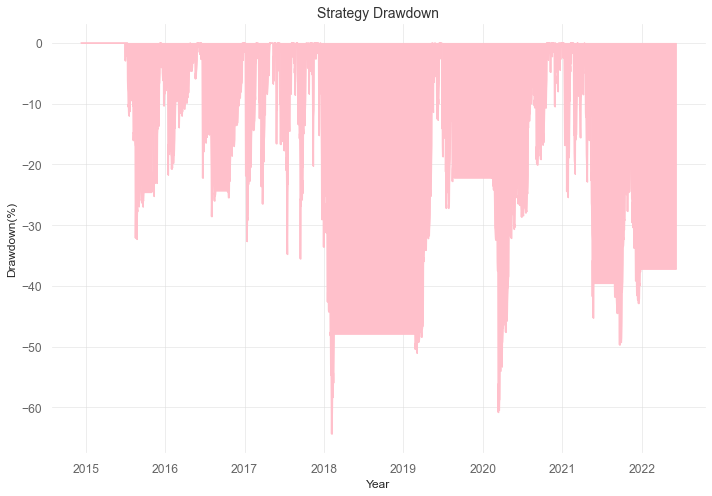

In [42]:
# Calculate the running maximum
running_max = np.maximum.accumulate(df["cumulative_returns"].dropna())
# Ensure the value never drops below 1
running_max[running_max < 1] = 1
# Calculate the percentage drawdown
drawdown = ((df["cumulative_returns"])/running_max - 1) * 100

# Calculate the maximum drawdown
print("Maximum drawdown of the strategy is {0:.2f}%".format(drawdown.min()))

fig = plt.figure(figsize=(10, 7))

# Plot max drawdown
plt.plot(drawdown, color="pink")
# Fill in-between the drawdown
plt.fill_between(drawdown.index, drawdown.values, color="pink")
plt.title("Strategy Drawdown", fontsize=14)
plt.ylabel("Drawdown(%)", fontsize=12)
plt.xlabel("Year", fontsize=12)

plt.tight_layout()
plt.show()

In [43]:
# qs.reports.html(strategy_returns)
qs.reports.html(strategy_returns, "BTC-USD", output="BTC-USD.html")

In [44]:
# extend pandas functionality with metrics, etc.
qs.extend_pandas()

                           Strategy
-------------------------  ----------
Start Period               2014-12-11
End Period                 2022-06-07
Risk-Free Rate             0.0%
Time in Market             61.0%

Cumulative Return          27,289.57%
CAGR﹪                     111.5%

Sharpe                     1.27
Prob. Sharpe Ratio         100.0%
Smart Sharpe               1.23
Sortino                    1.91
Smart Sortino              1.85
Sortino/√2                 1.35
Smart Sortino/√2           1.31
Omega                      1.37

Max Drawdown               -64.33%
Longest DD Days            512
Volatility (ann.)          51.47%
Calmar                     1.73
Skew                       -0.12
Kurtosis                   14.58

Expected Daily %           0.21%
Expected Monthly %         6.36%
Expected Yearly %          86.57%
Kelly Criterion            15.25%
Risk of Ruin               0.0%
Daily Value-at-Risk        -5.08%
Expected Shortfall (cVaR)  -5.08%

Max Consecutive Win

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2017-12-17,2018-02-05,2019-05-13,512,-64.327193,-55.900226
2,2019-06-27,2020-03-12,2020-10-21,482,-60.781376,-57.455605
3,2021-04-14,2021-09-21,2022-06-07,419,-49.678252,-47.024419
4,2017-09-02,2017-09-14,2017-10-12,40,-35.508102,-26.760574
5,2017-06-12,2017-07-16,2017-08-05,54,-34.761727,-32.427803


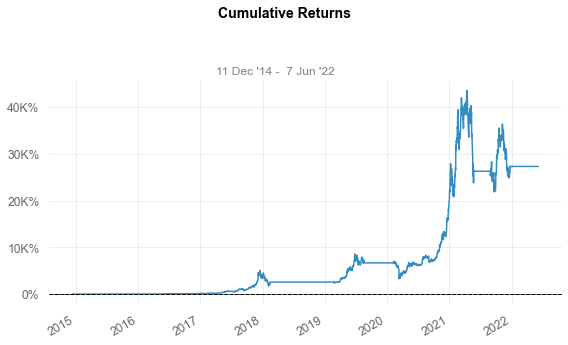

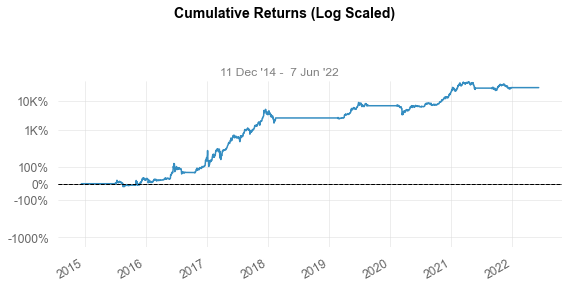

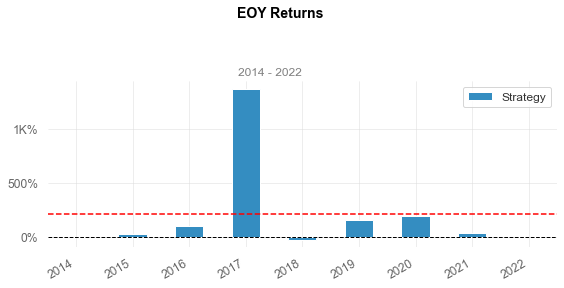

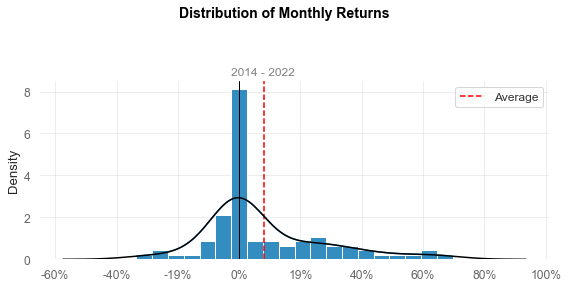

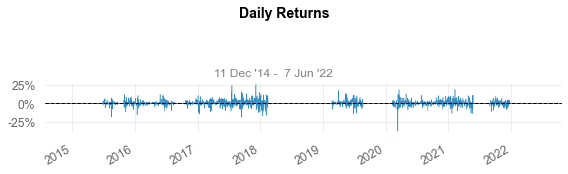

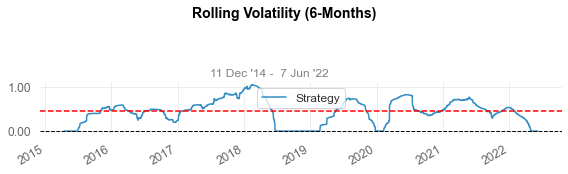

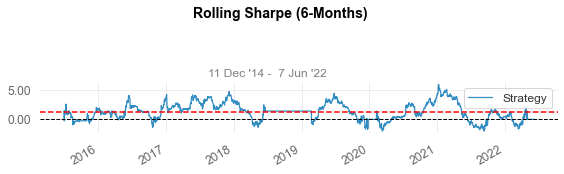

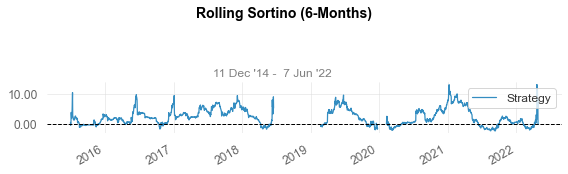

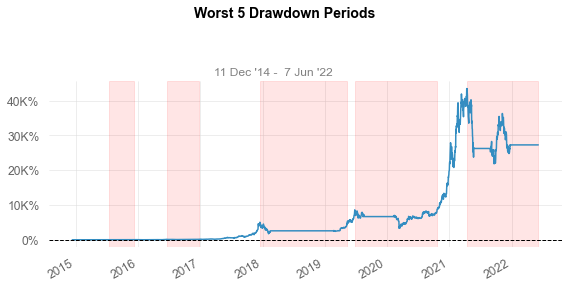

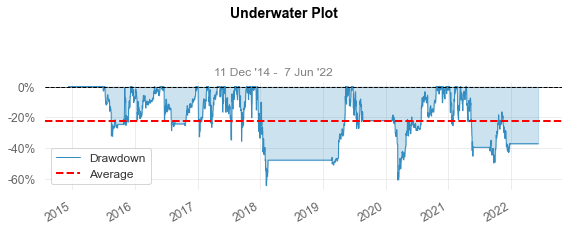

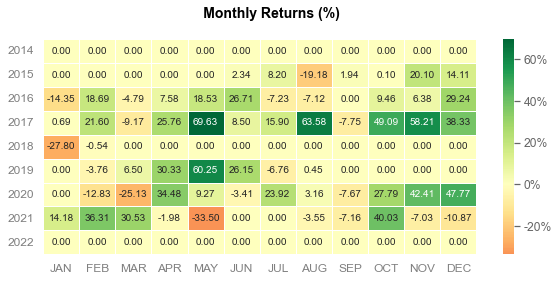

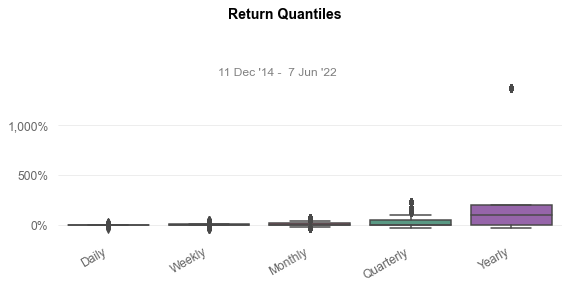

In [45]:
qs.reports.full(strategy_returns)